<a href="https://colab.research.google.com/github/ivz-dev/fast-ai/blob/main/uah_usd_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
from fastbook import *

     |████████████████████████████████| 719 kB 5.0 MB/s 
     |████████████████████████████████| 1.3 MB 56.3 MB/s 
     |████████████████████████████████| 365 kB 56.4 MB/s 
     |████████████████████████████████| 4.7 MB 25.8 MB/s 
     |████████████████████████████████| 120 kB 58.8 MB/s 
     |████████████████████████████████| 212 kB 55.9 MB/s 
     |████████████████████████████████| 115 kB 58.9 MB/s 
     |████████████████████████████████| 127 kB 63.5 MB/s 
     |████████████████████████████████| 6.6 MB 44.6 MB/s 


In [2]:
searches = 'ukrainian grivna','us dollar'
path = Path('grivna_or_dollar')

if not path.exists():
  path.mkdir(exist_ok=True)
  for search in searches:
    dest = (path/search)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{search} photo')
    download_images(dest, urls=results[:200])
    resize_images(dest, max_size=400, dest=dest)

In [3]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

11

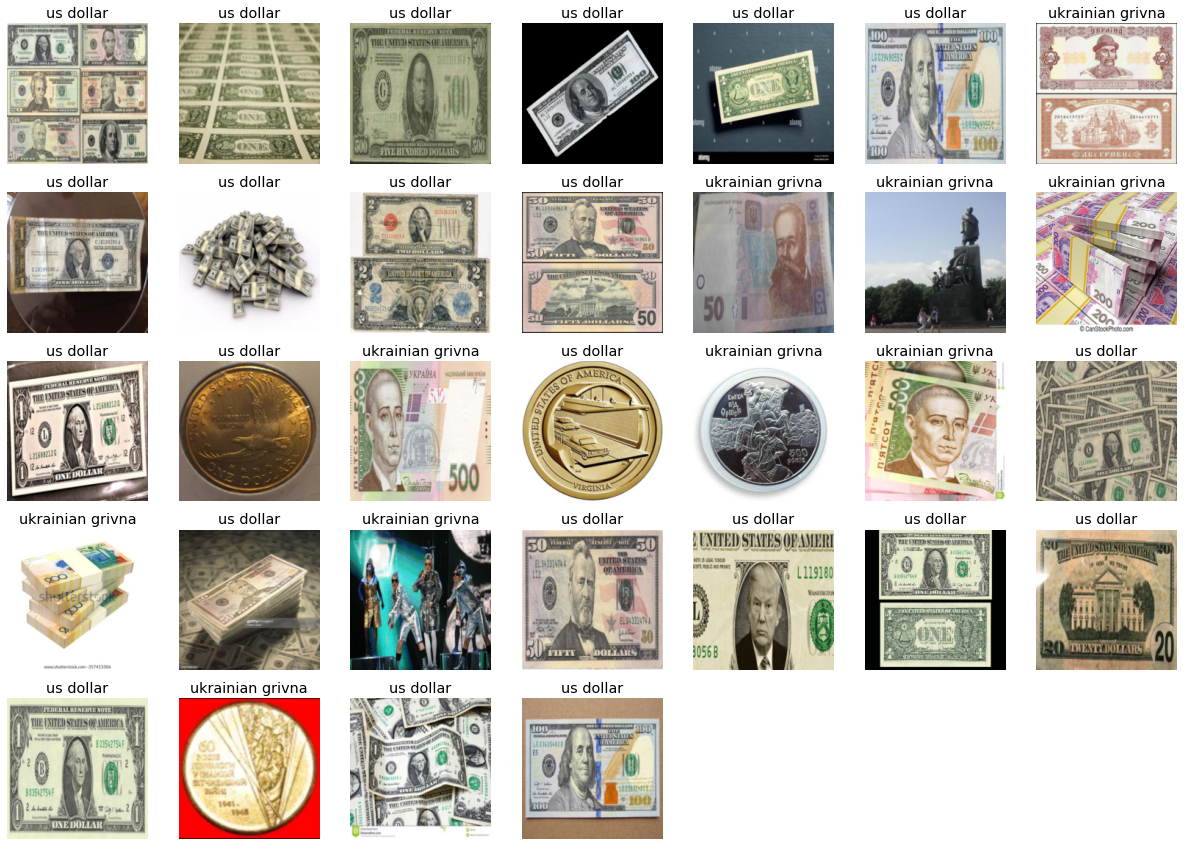

In [4]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=100)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

In [7]:
result = learn.predict(PILImage.create('dollar.jpeg'))
print(result)

('us dollar', TensorBase(1), TensorBase([0.0138, 0.9862]))
